In [86]:
%reset_selective <regular_expression>
import os 
import numpy as np
import matplotlib.pyplot as plt
import random
from bssfp import bssfp, add_noise_gaussian
from phantom_joint import mr_joint_phantom, get_phantom
from phantom_brainweb import mr_brain_web_phantom, brain_web_loader,offres_gen, mr_brain_web_SNR

Nothing done.


In [64]:
N = 128 # NxN resolution, 
npcs = 6 # npcs = number of phase-cycle

#Brain phantom 
dir = '/Users/yiten/Documents/MRI Relaxometry/BrainWeb' #Change to your directory of BrainWeb
data =  brain_web_loader(dir)

#randomize frequency, check inhomogeneity range
freq = 1000 * random.uniform(0,1)
print('Off-resonance frequency range: '+'{:.2f}'.format(freq))
offres = offres_gen(N,f=freq, rotate=True, deform=True) 

# alpha = flip angle
alpha = np.deg2rad(60)

Off-resonance frequency range: 567.48


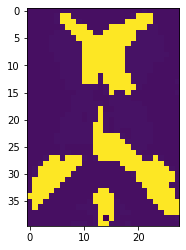

In [92]:
#Create brain phantom
phantom = mr_brain_web_phantom(data,alpha,offres=offres)
#Get phantom parameter
M0, T1, T2, flip_angle,df, _sample = get_phantom(phantom)
T2_cropped = T2[43:83, 50:78]
T2_cropped = (T2_cropped - np.min(T2_cropped))/(np.max(T2_cropped)-np.min(T2_cropped))
plt.imshow(T2_cropped)

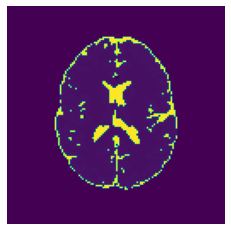

In [66]:
plt.imshow(T2)
plt.axis('off')
plt.savefig('T2.png')

In [67]:
# Simulate bSSFP acquisition with linear off-resonance
TR = 3e-3
pcs = np.linspace(0, 2 * np.pi, npcs, endpoint=False)
sig = bssfp(T1, T2, TR, flip_angle, field_map=df, phase_cyc=pcs, M0=M0)
print(sig.shape)

(6, 128, 128)


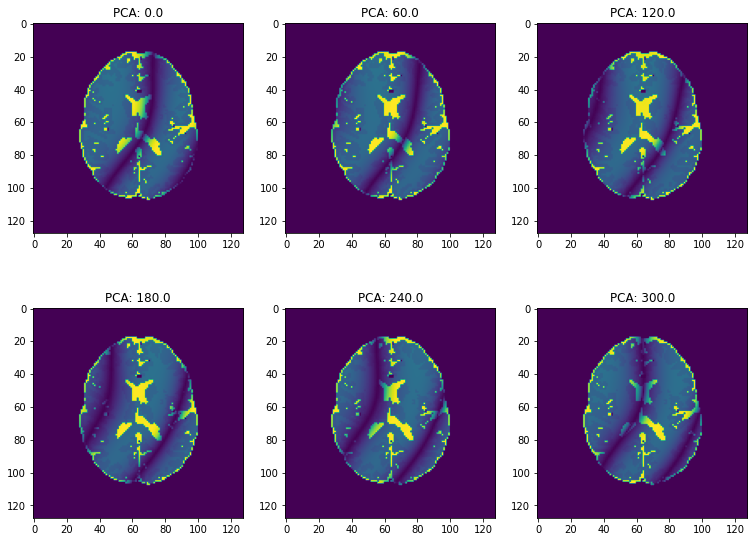

In [68]:
# Display phase-cycled images without noise
plt.figure(2, figsize=(12.8, 9.6))
for n in range(1, npcs + 1):
    plt.subplot(2, npcs / 2, n)
    plt.imshow(np.abs(sig[n - 1]))
    plt.title("PCA: %.1f" %np.rad2deg(pcs[n - 1]))
plt.show()

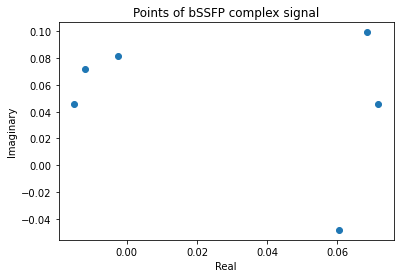

In [69]:
#Add Gaussian noise to phase-cycled images
noise_level = random.uniform(0.05,0.01)
sig_noise = add_noise_gaussian(sig, sigma=noise_level)
plt.figure()
plt.scatter(sig_noise[:,64,64].real,sig_noise[:,64,64].imag)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Points of bSSFP complex signal')
plt.show()

In [70]:
snr_csf, snr_gm, snr_wm = mr_brain_web_SNR(sig_noise, phantom, noise_level)
print('SNR(CSF): '+'{:.2f}'.format(snr_csf))
print('SNR(GM): '+'{:.2f}'.format(snr_gm))
print('SNR(WM): '+'{:.2f}'.format(snr_wm))

SNR(CSF): 27.44
SNR(GM): 7.44
SNR(WM): 8.39


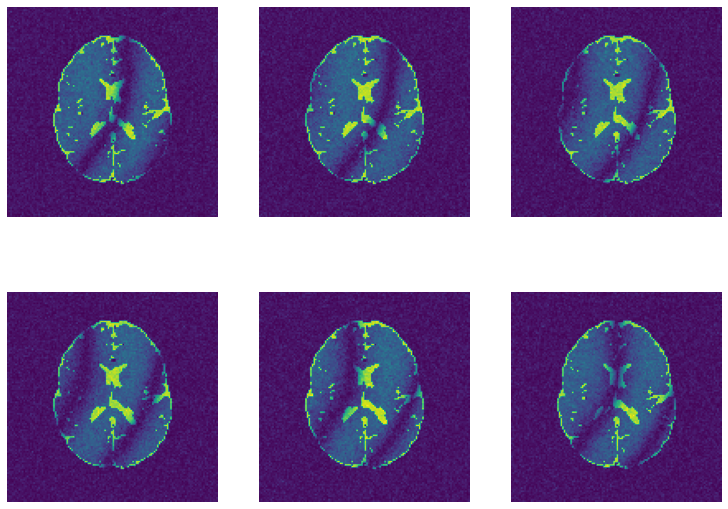

In [71]:
# Display phase-cycled images with noise
plt.figure(figsize=(12.8, 9.6))
plt.title('Phase_Cycled images with noise')
for n in range(1, npcs + 1):
    plt.subplot(2, npcs / 2, n)
    plt.imshow(np.abs(sig_noise[n - 1]))
    #plt.title('PC %d Degrees' % np.rad2deg(pcs[n - 1]))
    plt.axis('off')
plt.savefig('test.png')

In [72]:
os.chdir('c:\\Users\\yiten\\Documents\\FYP (Python)')

1
2
3
4
5
(128, 768)


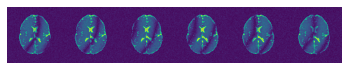

In [78]:
#Concatenate 
test_image = np.abs(sig_noise[0])
plt.imshow(test_image)
plt.axis('off')
plt.savefig('p1.png')
for i in range(1,6):
    print(i)
    test_image = np.concatenate([test_image, np.abs(sig_noise[i])],axis=1) #axis = 1 column wise, 0 row wise
print(test_image.shape)
plt.imshow(test_image)
plt.axis('off')
plt.savefig('test_image2.png')

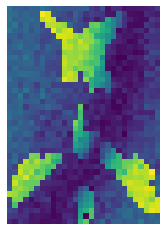

In [79]:
plt.imsave('test_image.png',np.abs(sig_noise[0][43:83, 50:78]))
plt.imshow(np.abs(sig_noise[0][43:83, 50:78]))
plt.axis('off')
plt.savefig('p2.png')

In [75]:
plt.imsave('gt.png',T2_cropped)

In [76]:
plt.imsave('gt2.png',T2)

In [77]:
 unique, counts = np.unique(T2_cropped, return_counts=True)
 dict(zip(unique, counts))

{0.0: 1, 0.08: 560, 0.1: 276, 1.99: 283}